#### CHURN ANALYSIS : NGO-FUND RAISING ATTRITION- CLASSIFICATION

 - Model to score their customer base in terms of their churn probability.

    #1. Importing Libraries and dataframes

In [1]:
import pandas as pd
import numpy as np

In [2]:
comclas_df = pd.read_sas('comclas.sas7bdat')
commaint_df = pd.read_sas('commaint.sas7bdat')
commediu_df = pd.read_sas('commediu.sas7bdat')
communication_df = pd.read_sas('communication.sas7bdat')
extrel_df = pd.read_sas('extrel.sas7bdat')
extrelty_df = pd.read_sas('extrelty.sas7bdat')
nameaddr_df = pd.read_sas('nameaddr.sas7bdat')
payhistory_df = pd.read_sas('payhistory.sas7bdat')

    #2. Analysis of data, data manipulation and data cleaning

#### Extrel: All the donors of the organization
    Extrelno:   Unique identifier of each donor
    Exrelactcd: Activity code of the donor
    Extrelstdt: Start date of the relationship
    Exreldaten: End date of the relationship (Missing: not ended)

In [3]:
extrel_df.head()

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN
0,0026414,CT,1995-02-02,NaT
1,0026419,FP,1992-03-01,NaT
2,0026424,FP,1992-03-01,1996-12-24
3,0026430,FP,1992-03-01,2006-01-31
4,0026430,CT,1997-03-07,NaT


#### Extrelty: Description of the activity
    Exrelactcd: Activity code of the donor
    Exrelactde: Description of the activity

In [4]:
extrelty_df.head()

,EXRELACTCD,EXRELACTDE
0,FP,CommitmentDo
1,PS,Prospect
2,PF,Prosp Fundra
3,PP,Prosp Promot
4,GR,Grantor


#### Nameaddr: Sociodemographical information
    Extrelno:     Unique identifier of each donor
    Name1title:   Title to address someone
    Postcode:     Postcode
    Languagecode: Preferred mailing language

In [5]:
nameaddr_df.head()

,EXTRELNO,NAME1TITLE,POSTCODE,LANGUACODE
0,0000019,HR,2500,NL
1,0000020,HR,9550,NL
2,0000035,HM,2150,NL
3,0000042,FA,3012,NL
4,0000043,MW,3000,NL


#### Payhistory: Paymenthistory of each donor
    Pid Unique: identifier for each payment
    Pdate:      Date of payment
    Pamt:       Amount of payment
    Extrelno:   Unique identifier of each donor
    Paytypecd:  Paytype
        O Bank transfer
        D Permanent order
        E Own initiative
        X Unknown
    Status:     Status of payment
        OK Normal/Real payment
        CO Correction (internal)
        RF RF (Refund)
        RC Recall

In [6]:
payhistory_df.head()

,PID,PDATE,PAMT,EXTRELNO,PAYTYPECD,STATUS
0,38.0,1993-12-31,9.57,0000019,X,CO
1,39.0,1993-12-31,41.32,0000020,X,CO
2,40.0,1993-12-31,13.10,0000020,X,CO
3,54091.0,1994-01-01,2.02,0000020,X,CO
4,104480.0,1994-05-19,0.50,0000020,D,OK


#### Communication: All possible communication between the donor and the organization
    Contid:     Unique identifier for each contact
    Mediumcode: Medium of the contact (CI is unknown)
    Mntopcode:  Main topic code of the contact
    Classcode:  Class of the contact
    Extrelno:   Unique identifier for each donor
    Contdirec:  Direction of the communication
        I Incoming
        P Outgoing
    Contdate:   Date of the contact

In [7]:
communication_df.head()

,CONTID,MEDIUMCODE,MNTOPCODE,CLASCODE,EXTRELNO,CONTDIREC,CONTDATE
0,000405402,CI,CTS,CT,0000020,O,1994-05-09
1,000430904,CI,CTS,CT,0000020,O,1994-06-14
2,000592732,CI,CTS,CT,0000020,O,1994-10-21
3,000593375,CI,CTS,CT,0000020,O,1994-10-21
4,000618514,CI,CTS,CT,0000020,O,1994-11-28


#### Commediu: Description of medium type

In [8]:
commediu_df.head()

,MEDIUMCODE,MEDIUMDESC
0,FF,Face to Face contact
1,FX,Fax
2,TX,Telex
3,EM,Electronic Mail
4,TE,Telephone call


#### Commaint: Description of the main topic code

In [9]:
commaint_df.head()

,MNTOPCODE,MNTOPDESC
0,CAN,Cancellations/replacements
1,DIS,Discontinuations
2,MKT,Marketing - Enquiries
3,GEN,General
4,NEW,New relations


#### Comclas: Description of the contact class

In [10]:
comclas_df

,CLASCODE,CLASDESC
0,CT,CTS-item
1,RI,Request for information
2,CM,Complaint
3,TA,Threath / Accusation
4,AK,Acknowledgement
5,RM,Reminder
6,ID,Information delivery
7,AN,Answer


    #3. Data Manipulation and creating new KPIs

    A. Working with Payment History Data

    Create the following independent variables :
    a. Frequency
    b. Recency
    c. Total and average donation per donor
    d. Pay type per customer
    
    Create new variables that signify whether a donor ever used sendout, order, own initiative and unknown
    
    Roll up data at EXTRELNO Level; so that there is only one observation per customer

In [11]:
payhistory_df.head()

,PID,PDATE,PAMT,EXTRELNO,PAYTYPECD,STATUS
0,38.0,1993-12-31,9.57,0000019,X,CO
1,39.0,1993-12-31,41.32,0000020,X,CO
2,40.0,1993-12-31,13.10,0000020,X,CO
3,54091.0,1994-01-01,2.02,0000020,X,CO
4,104480.0,1994-05-19,0.50,0000020,D,OK


In [12]:
payhistory_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1205720 entries, 0 to 1205719
Data columns (total 6 columns):
PID          1205720 non-null float64
PDATE        1205720 non-null datetime64[ns]
PAMT         1205720 non-null float64
EXTRELNO     1205720 non-null object
PAYTYPECD    1187546 non-null object
STATUS       1205719 non-null object
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 64.4+ MB


    Filtering out the Normal Payemnt (OK) Only

In [13]:
payhistory_real = payhistory_df[payhistory_df['STATUS'] == 'OK']

In [14]:
payhistory_real.head()

,PID,PDATE,PAMT,EXTRELNO,PAYTYPECD,STATUS
4,104480.0,1994-05-19,0.5,0000020,D,OK
5,128703.0,1994-06-14,0.5,0000020,D,OK
6,151581.0,1994-07-05,0.5,0000020,D,OK
7,182688.0,1994-08-15,0.5,0000020,D,OK
8,210468.0,1994-09-23,0.5,0000020,D,OK


    Creating Dummies for PAYTYPECD of payment

In [15]:
col_dummies=pd.get_dummies(payhistory_real['PAYTYPECD'], prefix='PAYTYPECD')
payhistory_real_df = pd.concat([payhistory_real, col_dummies ], axis=1)
payhistory_real_df.drop( ['PAYTYPECD'], axis = 1, inplace = True )

In [16]:
payhistory_real_df.head()

,PID,PDATE,PAMT,EXTRELNO,STATUS,PAYTYPECD_D,PAYTYPECD_E,PAYTYPECD_O,PAYTYPECD_X
4,104480.0,1994-05-19,0.5,0000020,OK,1,0,0,0
5,128703.0,1994-06-14,0.5,0000020,OK,1,0,0,0
6,151581.0,1994-07-05,0.5,0000020,OK,1,0,0,0
7,182688.0,1994-08-15,0.5,0000020,OK,1,0,0,0
8,210468.0,1994-09-23,0.5,0000020,OK,1,0,0,0


    Converting PDATE - Payment date to date-time for data manipulation/filter

In [17]:
from datetime import datetime 
payhistory_real_df['PDATE'] = pd.to_datetime(payhistory_real_df['PDATE'])

    Grouping Payhistory by Extrelno and defining framework for new KPI

In [18]:
payhistory_by_extrel = payhistory_real_df[['EXTRELNO','PDATE','PAMT','PID','PAYTYPECD_D','PAYTYPECD_E', 'PAYTYPECD_O', 'PAYTYPECD_X']].groupby(['EXTRELNO']).agg({'PID':'count', 'PDATE' :'max', 'PAYTYPECD_D':'sum', 'PAYTYPECD_E':'sum', 'PAYTYPECD_O':'sum', 'PAYTYPECD_X':'sum',  'PAMT': 'sum'}).rename(columns={'PID':'No_of_Payment', 'PDATE': 'Last_Payment_Date' , 'PAYTYPECD_D':'Count_Of_Permanent_Order', 'PAYTYPECD_E':'Count_Of_Own_Initiative', 'PAYTYPECD_O':'Count_Of_Bank_Transfer', 'PAYTYPECD_X':'Count_Of_Unknown_Paytypecd', 'PAMT': 'SUM_OF_PAMT'}).reset_index()

In [19]:
payhistory_by_extrel.head()

,EXTRELNO,Count_Of_Unknown_Paytypecd,Last_Payment_Date,SUM_OF_PAMT,No_of_Payment,Count_Of_Bank_Transfer,Count_Of_Own_Initiative,Count_Of_Permanent_Order
0,0000020,0,2007-01-17,3120.53,153,0.0,0,153.0
1,0000035,0,2007-01-17,3120.53,153,0.0,0,153.0
2,0000042,0,2001-01-12,1507.92,81,0.0,0,81.0
3,0000043,0,2003-07-14,4284.73,221,0.0,0,221.0
4,0000060,0,1999-12-07,1263.96,69,0.0,0,69.0


    KPI - Frequency

In [20]:
payhistory_by_extrel.rename(columns={'No_of_Payment' : 'Frequency'}, inplace = True)

    KPI - Recency

In [21]:
from datetime import datetime 
a = datetime.now()
payhistory_by_extrel['Recency'] = payhistory_by_extrel['Last_Payment_Date'].apply(lambda x: (a - x).days)

    KPI - Total and average donation per donor

In [22]:
payhistory_by_extrel['Avg_Donation'] = payhistory_by_extrel['SUM_OF_PAMT']/payhistory_by_extrel['Frequency']

In [23]:
payhistory_by_extrel.rename(columns={'SUM_OF_PAMT' : 'Total_Donation'}, inplace = True)

    Droping redundant columns and dtypes

In [24]:
payhistory_by_extrel.drop('Last_Payment_Date', axis=1, inplace = True)

In [25]:
payhistory_by_extrel[['Count_Of_Unknown_Paytypecd', 'Count_Of_Bank_Transfer', 'Count_Of_Own_Initiative', 'Count_Of_Permanent_Order', ]] = payhistory_by_extrel[[ 'Count_Of_Unknown_Paytypecd', 'Count_Of_Bank_Transfer', 'Count_Of_Own_Initiative', 'Count_Of_Permanent_Order' ]].astype('int64')

In [26]:
payhistory_by_extrel.head()

,EXTRELNO,Count_Of_Unknown_Paytypecd,Total_Donation,Frequency,Count_Of_Bank_Transfer,Count_Of_Own_Initiative,Count_Of_Permanent_Order,Recency,Avg_Donation
0,0000020,0,3120.53,153,0,0,153,4075,20.395621
1,0000035,0,3120.53,153,0,0,153,4075,20.395621
2,0000042,0,1507.92,81,0,0,81,6271,18.616296
3,0000043,0,4284.73,221,0,0,221,5358,19.387919
4,0000060,0,1263.96,69,0,0,69,6673,18.318261


In [27]:
payhistory_by_extrel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15174 entries, 0 to 15173
Data columns (total 9 columns):
EXTRELNO                      15174 non-null object
Count_Of_Unknown_Paytypecd    15174 non-null int64
Total_Donation                15174 non-null float64
Frequency                     15174 non-null int64
Count_Of_Bank_Transfer        15174 non-null int64
Count_Of_Own_Initiative       15174 non-null int64
Count_Of_Permanent_Order      15174 non-null int64
Recency                       15174 non-null int64
Avg_Donation                  15174 non-null float64
dtypes: float64(2), int64(6), object(1)
memory usage: 1.0+ MB


    B. Working with Communication History Data

    Dummy whether the donor made a complaint
    Dummy whether communication direction was ever incoming
    Roll up data at EXTRELNO Level; so that there is one observation per customer

In [28]:
communication_df.head()

,CONTID,MEDIUMCODE,MNTOPCODE,CLASCODE,EXTRELNO,CONTDIREC,CONTDATE
0,000405402,CI,CTS,CT,0000020,O,1994-05-09
1,000430904,CI,CTS,CT,0000020,O,1994-06-14
2,000592732,CI,CTS,CT,0000020,O,1994-10-21
3,000593375,CI,CTS,CT,0000020,O,1994-10-21
4,000618514,CI,CTS,CT,0000020,O,1994-11-28


In [29]:
communication_df.head()

,CONTID,MEDIUMCODE,MNTOPCODE,CLASCODE,EXTRELNO,CONTDIREC,CONTDATE
0,000405402,CI,CTS,CT,0000020,O,1994-05-09
1,000430904,CI,CTS,CT,0000020,O,1994-06-14
2,000592732,CI,CTS,CT,0000020,O,1994-10-21
3,000593375,CI,CTS,CT,0000020,O,1994-10-21
4,000618514,CI,CTS,CT,0000020,O,1994-11-28


    Creating Dummies for CONTDIREC and CLASCODE - Categorical variables

In [30]:
col_dummies1=pd.get_dummies(communication_df['CONTDIREC'], prefix='CONTDIREC')
col_dummies2=pd.get_dummies(communication_df['CLASCODE'], prefix='CLASCODE')
communication_df_new = pd.concat([communication_df, col_dummies1, col_dummies2], axis=1)
communication_df_new.drop( ['CONTDIREC', 'CLASCODE'], axis = 1, inplace = True )

In [31]:
communication_df_new.head()

,CONTID,MEDIUMCODE,MNTOPCODE,EXTRELNO,CONTDATE,CONTDIREC_I,CONTDIREC_O,CLASCODE_AK,CLASCODE_AN,CLASCODE_CM,CLASCODE_CT,CLASCODE_ID,CLASCODE_NS,CLASCODE_PM,CLASCODE_RI,CLASCODE_RM
0,000405402,CI,CTS,0000020,1994-05-09,0,1,0,0,0,1,0,0,0,0,0
1,000430904,CI,CTS,0000020,1994-06-14,0,1,0,0,0,1,0,0,0,0,0
2,000592732,CI,CTS,0000020,1994-10-21,0,1,0,0,0,1,0,0,0,0,0
3,000593375,CI,CTS,0000020,1994-10-21,0,1,0,0,0,1,0,0,0,0,0
4,000618514,CI,CTS,0000020,1994-11-28,0,1,0,0,0,1,0,0,0,0,0


    Rolling up data by exrelno

In [32]:
communication_by_exrel = communication_df_new[['CONTID', 'EXTRELNO', 'CONTDIREC_I', 'CONTDIREC_O', 'CLASCODE_AK', 'CLASCODE_AN', 'CLASCODE_CM', 'CLASCODE_CT', 'CLASCODE_ID', 'CLASCODE_NS', 'CLASCODE_PM', 'CLASCODE_RI', 'CLASCODE_RM']].groupby(['EXTRELNO']).agg({'CONTID' :'count' , 'CONTDIREC_I' :'sum', 'CONTDIREC_O' :'sum', 'CLASCODE_AK' :'sum', 'CLASCODE_AN' :'sum', 'CLASCODE_CM' :'sum', 'CLASCODE_CT' :'sum', 'CLASCODE_ID' :'sum', 'CLASCODE_NS' :'sum', 'CLASCODE_PM' :'sum', 'CLASCODE_RI' :'sum', 'CLASCODE_RM':'sum'}).rename(columns={'CONTID' :'CONTID_CNT' , 'CONTDIREC_I' :'CONTDIREC_I_CNT', 'CONTDIREC_O' :'CONTDIREC_O_CNT', 'CLASCODE_AK' :'CLASCODE_AK_CNT', 'CLASCODE_AN' :'CLASCODE_AN_CNT', 'CLASCODE_CM' :'CLASCODE_CM_CNT', 'CLASCODE_CT' :'CLASCODE_CT_CNT', 'CLASCODE_ID' :'CLASCODE_ID_CNT', 'CLASCODE_NS' :'CLASCODE_NS_CNT', 'CLASCODE_PM' :'CLASCODE_PM_CNT', 'CLASCODE_RI' :'CLASCODE_RI_CNT', 'CLASCODE_RM':'CLASCODE_RM_CNT'}).reset_index()

In [33]:
communication_by_exrel.head()

,EXTRELNO,CONTDIREC_I_CNT,CLASCODE_PM_CNT,CONTDIREC_O_CNT,CLASCODE_CM_CNT,CLASCODE_AK_CNT,CLASCODE_CT_CNT,CLASCODE_AN_CNT,CONTID_CNT,CLASCODE_NS_CNT,CLASCODE_ID_CNT,CLASCODE_RM_CNT,CLASCODE_RI_CNT
0,0000020,0,1,53.0,0,0,33.0,1,53,0,18,0,0
1,0000035,2,1,59.0,0,1,38.0,1,61,0,20,0,0
2,0000042,1,0,35.0,0,0,24.0,1,36,0,9,1,1
3,0000043,4,1,108.0,0,1,83.0,7,112,0,18,0,2
4,0000060,2,0,34.0,0,0,22.0,3,36,0,10,0,1


    Creating dummy to signify whether communication direction was ever incoming

In [34]:
def communicationtyp(communication_by_exrel):
    if ((communication_by_exrel.CONTDIREC_I_CNT  > 0) & (communication_by_exrel.CONTDIREC_O_CNT == 0)):
        return 'ONLY_IN'
    elif ((communication_by_exrel.CONTDIREC_I_CNT  == 0) & (communication_by_exrel.CONTDIREC_O_CNT > 0)):
        return 'ONLY_OUT'
    elif ((communication_by_exrel.CONTDIREC_I_CNT > 0) & (communication_by_exrel.CONTDIREC_O_CNT > 0)):
        return 'BOTH_IN_OUT'
    else:
        return 'NONE'

In [35]:
communication_by_exrel['COMMUNICATION_TYPE'] = communication_by_exrel.apply(communicationtyp, axis=1)

    Deriving New KPI for communication and complaint
    
        'CONTID_CNT' renamed as      'Total_No_Of_Communications'
        'CLASCODE_CM_CNT' renamed as 'No_Of_Complaints'

In [36]:
communication_by_exrel.rename(columns={'CONTID_CNT' : 'Total_No_Of_Communications'}, inplace = True)

In [37]:
communication_by_exrel.rename(columns={'CLASCODE_CM_CNT' : 'No_Of_Complaints'}, inplace = True)

In [38]:
communication_by_exrel['No_Of_Complaints'] = communication_by_exrel['No_Of_Complaints'].astype('int64')

    Droping Redundant variables

In [39]:
communication_by_exrel.drop(['CONTDIREC_I_CNT', 'CONTDIREC_O_CNT', 'CLASCODE_AK_CNT', 'CLASCODE_AN_CNT', 'CLASCODE_CT_CNT', 'CLASCODE_ID_CNT', 'CLASCODE_NS_CNT', 'CLASCODE_PM_CNT', 'CLASCODE_RI_CNT', 'CLASCODE_RM_CNT' ], axis=1, inplace = True)

In [40]:
communication_by_exrel.head()

,EXTRELNO,No_Of_Complaints,Total_No_Of_Communications,COMMUNICATION_TYPE
0,0000020,0,53,ONLY_OUT
1,0000035,0,61,BOTH_IN_OUT
2,0000042,0,36,BOTH_IN_OUT
3,0000043,0,112,BOTH_IN_OUT
4,0000060,0,36,BOTH_IN_OUT


In [41]:
communication_by_exrel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21932 entries, 0 to 21931
Data columns (total 4 columns):
EXTRELNO                      21932 non-null object
No_Of_Complaints              21932 non-null int64
Total_No_Of_Communications    21932 non-null int64
COMMUNICATION_TYPE            21932 non-null object
dtypes: int64(2), object(2)
memory usage: 685.4+ KB


    C. Working with Nameaddr: Sociodemographical information

    Getting Preferred mailing language

In [42]:
nameaddr_df.head()

,EXTRELNO,NAME1TITLE,POSTCODE,LANGUACODE
0,0000019,HR,2500,NL
1,0000020,HR,9550,NL
2,0000035,HM,2150,NL
3,0000042,FA,3012,NL
4,0000043,MW,3000,NL


In [43]:
nameaddr_df.count()

EXTRELNO      24186
NAME1TITLE    23593
POSTCODE      24034
LANGUACODE    24186
dtype: int64

In [44]:
nameaddr_df.nunique()

EXTRELNO      24186
NAME1TITLE        7
POSTCODE       1080
LANGUACODE        3
dtype: int64

In [45]:
nameaddr_df.groupby('LANGUACODE')['EXTRELNO'].nunique()

LANGUACODE
EN        6
FR     2743
NL    21437
Name: EXTRELNO, dtype: int64

    Getting Dummies for LANGUACODE - Categorical variable

In [46]:
get_dummies = pd.get_dummies(data=nameaddr_df['LANGUACODE'], prefix='LANGUACODE', drop_first=False)
nameaddr_by_exrel = pd.concat([nameaddr_df,get_dummies], axis=1)

In [47]:
nameaddr_by_exrel.drop(['LANGUACODE', 'NAME1TITLE','POSTCODE'], axis=1, inplace = True)

In [48]:
nameaddr_by_exrel[['LANGUACODE_FR', 'LANGUACODE_NL', 'LANGUACODE_EN']] = nameaddr_by_exrel[['LANGUACODE_FR', 'LANGUACODE_NL', 'LANGUACODE_EN']].astype('int64')

In [49]:
nameaddr_by_exrel.head()

,EXTRELNO,LANGUACODE_EN,LANGUACODE_FR,LANGUACODE_NL
0,0000019,0,0,1
1,0000020,0,0,1
2,0000035,0,0,1
3,0000042,0,0,1
4,0000043,0,0,1


    D. Creating the final data merging the manipulated datsets with extrel_df on key 'EXTRELNO'
    nameaddr_by_exrel      --> prefered mailing language details
    communication_by_exrel --> communication details
    payhistory_by_extrel   --> payhistory details

In [50]:
extrel_df_inter1 = pd.merge(extrel_df, communication_by_exrel, how='left', on=['EXTRELNO'])

In [51]:
extrel_df_inter2 = pd.merge(extrel_df_inter1, nameaddr_by_exrel, how='left', on=['EXTRELNO'])

In [52]:
extrel_df_final = pd.merge(extrel_df_inter2, payhistory_by_extrel, how='left', on=['EXTRELNO'])

In [53]:
extrel_df_final.head()

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN,No_Of_Complaints,Total_No_Of_Communications,COMMUNICATION_TYPE,LANGUACODE_EN,LANGUACODE_FR,LANGUACODE_NL,Count_Of_Unknown_Paytypecd,Total_Donation,Frequency,Count_Of_Bank_Transfer,Count_Of_Own_Initiative,Count_Of_Permanent_Order,Recency,Avg_Donation
0,0026414,CT,1995-02-02,NaT,0.0,57.0,BOTH_IN_OUT,0,0,1,0.0,3120.53,153.0,0.0,0.0,153.0,4075.0,20.395621
1,0026419,FP,1992-03-01,NaT,0.0,60.0,BOTH_IN_OUT,0,0,1,0.0,3385.40,59.0,52.0,7.0,0.0,4090.0,57.379661
2,0026424,FP,1992-03-01,1996-12-24,0.0,26.0,BOTH_IN_OUT,0,0,1,0.0,512.25,33.0,33.0,0.0,0.0,7742.0,15.522727
3,0026430,FP,1992-03-01,2006-01-31,1.0,61.0,BOTH_IN_OUT,0,0,1,0.0,2815.68,140.0,3.0,0.0,137.0,4531.0,20.112000
4,0026430,CT,1997-03-07,NaT,1.0,61.0,BOTH_IN_OUT,0,0,1,0.0,2815.68,140.0,3.0,0.0,137.0,4531.0,20.112000


In [54]:
extrel_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26689 entries, 0 to 26688
Data columns (total 18 columns):
EXTRELNO                      26689 non-null object
EXRELACTCD                    26689 non-null object
EXTRELSTDT                    26689 non-null datetime64[ns]
EXRELDATEN                    10168 non-null datetime64[ns]
No_Of_Complaints              25356 non-null float64
Total_No_Of_Communications    25356 non-null float64
COMMUNICATION_TYPE            25356 non-null object
LANGUACODE_EN                 26689 non-null int64
LANGUACODE_FR                 26689 non-null int64
LANGUACODE_NL                 26689 non-null int64
Count_Of_Unknown_Paytypecd    18460 non-null float64
Total_Donation                18460 non-null float64
Frequency                     18460 non-null float64
Count_Of_Bank_Transfer        18460 non-null float64
Count_Of_Own_Initiative       18460 non-null float64
Count_Of_Permanent_Order      18460 non-null float64
Recency                       18460 no

In [55]:
extrel_df_final.isnull().any()

EXTRELNO                      False
EXRELACTCD                    False
EXTRELSTDT                    False
EXRELDATEN                     True
No_Of_Complaints               True
Total_No_Of_Communications     True
COMMUNICATION_TYPE             True
LANGUACODE_EN                 False
LANGUACODE_FR                 False
LANGUACODE_NL                 False
Count_Of_Unknown_Paytypecd     True
Total_Donation                 True
Frequency                      True
Count_Of_Bank_Transfer         True
Count_Of_Own_Initiative        True
Count_Of_Permanent_Order       True
Recency                        True
Avg_Donation                   True
dtype: bool

    E. Preparing the final dataset for training and testing

    Selecting donors with a commitment only

In [56]:
extrel_final_df = extrel_df_final[extrel_df_final.EXRELACTCD == 'FP']

#### Training data Time Window
    Independent Window for Training data : 
            1989/01/01 - 2002/12/31
    Dependent Window for Training data   :
            2003/01/01 - 2005/12/31

#### Testing data Time Window
    Independent Window for Testing data  : 
            2003/01/01 - 2006/12/31
    Dependent Window for Testing data    :
            2007/01/01 - 2007/12/31

#### Defination of Active customer  - 
    Activity code = FP and start date before end of Independent Window and end date after start of Dependent Window  or missing End Date

#### Preparing the Train Data
    Getting data that has start date before the the end of Independent window (2002/12/31) 
    and end date after the start of dependent window (2003/01/01)

In [57]:
import datetime 
fund_data_1989_2005 = extrel_final_df[(extrel_final_df['EXTRELSTDT']<= datetime.date(2002,12,31))]  

In [58]:
fund_data_1989_2005.tail()

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN,No_Of_Complaints,Total_No_Of_Communications,COMMUNICATION_TYPE,LANGUACODE_EN,LANGUACODE_FR,LANGUACODE_NL,Count_Of_Unknown_Paytypecd,Total_Donation,Frequency,Count_Of_Bank_Transfer,Count_Of_Own_Initiative,Count_Of_Permanent_Order,Recency,Avg_Donation
23015,0229421,FP,2002-12-01,NaT,0.0,46.0,BOTH_IN_OUT,0,0,1,0.0,1152.0,48.0,0.0,0.0,48.0,4075.0,24.000000
23016,0229423,FP,2002-12-01,NaT,0.0,24.0,BOTH_IN_OUT,0,0,1,0.0,1152.0,48.0,0.0,0.0,48.0,4075.0,24.000000
23017,0229425,FP,2002-12-01,2005-10-12,0.0,24.0,BOTH_IN_OUT,0,0,1,0.0,923.0,28.0,1.0,0.0,27.0,4717.0,32.964286
23018,0229426,FP,2002-12-01,NaT,0.0,37.0,ONLY_OUT,0,0,1,0.0,1202.0,18.0,1.0,0.0,17.0,4075.0,66.777778
23414,0230793,FP,2002-12-01,NaT,0.0,25.0,BOTH_IN_OUT,0,0,1,0.0,1058.0,16.0,8.0,8.0,0.0,4108.0,66.125000


    Getting the active data - with no end date

In [59]:
fund_data_active_1989_2005=fund_data_1989_2005[fund_data_1989_2005['EXRELDATEN'].isnull() == True]

    Getting the churned data - with end date within the dependent window only

In [60]:
fund_data_churn_train = fund_data_1989_2005[(fund_data_1989_2005['EXRELDATEN']>= datetime.date(2003,1,1)) & (fund_data_1989_2005['EXRELDATEN']<= datetime.date(2005,12,31))]  

    Dropping the rows with overlap - to get one row per EXTRELNO

In [61]:
churn_rel = fund_data_churn_train['EXTRELNO']

In [62]:
to_drop = fund_data_active_1989_2005[fund_data_active_1989_2005['EXTRELNO'].isin(churn_rel)]

    There seems to be only one customer who appears duplicate in both the dataframe

In [63]:
to_drop

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN,No_Of_Complaints,Total_No_Of_Communications,COMMUNICATION_TYPE,LANGUACODE_EN,LANGUACODE_FR,LANGUACODE_NL,Count_Of_Unknown_Paytypecd,Total_Donation,Frequency,Count_Of_Bank_Transfer,Count_Of_Own_Initiative,Count_Of_Permanent_Order,Recency,Avg_Donation
22405,0227246,FP,2002-08-01,NaT,0.0,26.0,BOTH_IN_OUT,0,0,1,0.0,1463.32,56.0,1.0,0.0,55.0,4075.0,26.130714


In [64]:
fund_data_active_train = fund_data_active_1989_2005[~fund_data_active_1989_2005['EXTRELNO'].isin(churn_rel)]

    Setting CHURN_IND - defining active and churned customer

In [65]:
fund_data_churn_train['CHURN_IND'] = 1

C:\Users\lenovo\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
fund_data_active_train['CHURN_IND'] = 0

C:\Users\lenovo\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


    Concatinating the active and churned Training data 

In [67]:
frames = [fund_data_active_train, fund_data_churn_train]
train_df = pd.concat(frames)

In [68]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6313 entries, 1 to 23017
Data columns (total 19 columns):
EXTRELNO                      6313 non-null object
EXRELACTCD                    6313 non-null object
EXTRELSTDT                    6313 non-null datetime64[ns]
EXRELDATEN                    859 non-null datetime64[ns]
No_Of_Complaints              6313 non-null float64
Total_No_Of_Communications    6313 non-null float64
COMMUNICATION_TYPE            6313 non-null object
LANGUACODE_EN                 6313 non-null int64
LANGUACODE_FR                 6313 non-null int64
LANGUACODE_NL                 6313 non-null int64
Count_Of_Unknown_Paytypecd    6300 non-null float64
Total_Donation                6300 non-null float64
Frequency                     6300 non-null float64
Count_Of_Bank_Transfer        6300 non-null float64
Count_Of_Own_Initiative       6300 non-null float64
Count_Of_Permanent_Order      6300 non-null float64
Recency                       6300 non-null float64
Avg_

In [69]:
train_df.count()

EXTRELNO                      6313
EXRELACTCD                    6313
EXTRELSTDT                    6313
EXRELDATEN                     859
No_Of_Complaints              6313
Total_No_Of_Communications    6313
COMMUNICATION_TYPE            6313
LANGUACODE_EN                 6313
LANGUACODE_FR                 6313
LANGUACODE_NL                 6313
Count_Of_Unknown_Paytypecd    6300
Total_Donation                6300
Frequency                     6300
Count_Of_Bank_Transfer        6300
Count_Of_Own_Initiative       6300
Count_Of_Permanent_Order      6300
Recency                       6300
Avg_Donation                  6300
CHURN_IND                     6313
dtype: int64

In [70]:
train_df.nunique()

EXTRELNO                      6313
EXRELACTCD                       1
EXTRELSTDT                     130
EXRELDATEN                     364
No_Of_Complaints                 9
Total_No_Of_Communications     213
COMMUNICATION_TYPE               2
LANGUACODE_EN                    1
LANGUACODE_FR                    2
LANGUACODE_NL                    2
Count_Of_Unknown_Paytypecd       3
Total_Donation                2973
Frequency                      257
Count_Of_Bank_Transfer         177
Count_Of_Own_Initiative         42
Count_Of_Permanent_Order       226
Recency                        530
Avg_Donation                  3282
CHURN_IND                        2
dtype: int64

In [71]:
train_df.isnull().any()

EXTRELNO                      False
EXRELACTCD                    False
EXTRELSTDT                    False
EXRELDATEN                     True
No_Of_Complaints              False
Total_No_Of_Communications    False
COMMUNICATION_TYPE            False
LANGUACODE_EN                 False
LANGUACODE_FR                 False
LANGUACODE_NL                 False
Count_Of_Unknown_Paytypecd     True
Total_Donation                 True
Frequency                      True
Count_Of_Bank_Transfer         True
Count_Of_Own_Initiative        True
Count_Of_Permanent_Order       True
Recency                        True
Avg_Donation                   True
CHURN_IND                     False
dtype: bool

    Dropping redundant varibles
    - We do not need start Date and End date becasue we have already defined the time window
    - We will not need EXRELACTCD ; since it is "FP" for all

In [72]:
train_df.drop(['EXRELACTCD','EXTRELSTDT','EXRELDATEN','LANGUACODE_EN'], axis =1, inplace = True)

    Peeping into profiling of train data

In [73]:
import pandas_profiling
pandas_profiling.ProfileReport(train_df)

Number of variables,16
Number of observations,6313
Total Missing (%),0.1%
Total size in memory,789.2 KiB
Average record size in memory,128.0 B
Numeric,13
Categorical,1
Date,0
Text (Unique),1
Rejected,1
Distinct count,3283


In [74]:
train_df[train_df['Count_Of_Unknown_Paytypecd'].isnull() == True]

,EXTRELNO,No_Of_Complaints,Total_No_Of_Communications,COMMUNICATION_TYPE,LANGUACODE_FR,LANGUACODE_NL,Count_Of_Unknown_Paytypecd,Total_Donation,Frequency,Count_Of_Bank_Transfer,Count_Of_Own_Initiative,Count_Of_Permanent_Order,Recency,Avg_Donation,CHURN_IND
2907,0037060,0.0,5.0,ONLY_OUT,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5364,0158182,0.0,7.0,ONLY_OUT,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
16274,0204973,0.0,11.0,ONLY_OUT,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
21913,0225687,0.0,12.0,BOTH_IN_OUT,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
22667,0228158,0.0,11.0,BOTH_IN_OUT,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
22682,0228196,0.0,15.0,BOTH_IN_OUT,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
22807,0228636,0.0,8.0,BOTH_IN_OUT,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
22812,0228653,0.0,9.0,BOTH_IN_OUT,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
22847,0228799,0.0,11.0,BOTH_IN_OUT,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
22868,0228880,0.0,12.0,ONLY_OUT,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


    Dealing with Null Columns -
        There are 13 rows where customer is active but has no contribution within the selected timewindow.
        Replacing the count values to ZERO and Recency to highest Recency (Max)

In [75]:
train_df[['Count_Of_Unknown_Paytypecd', 'Total_Donation', 'Frequency', 'Count_Of_Bank_Transfer', 'Count_Of_Own_Initiative', 'Count_Of_Permanent_Order', 'Avg_Donation' ]] = train_df[['Count_Of_Unknown_Paytypecd', 'Total_Donation', 'Frequency', 'Count_Of_Bank_Transfer', 'Count_Of_Own_Initiative', 'Count_Of_Permanent_Order', 'Avg_Donation' ]].replace(np.nan, 0 , regex=True)

In [76]:
train_df['Recency'] = train_df['Recency'].replace(np.nan, train_df['Recency'].max() , regex=True)

    Dealing With Categorical variable - COMMUNICATION_TYPE
    Creating dummies and droping original variable

In [77]:
col_dummies=pd.get_dummies(train_df['COMMUNICATION_TYPE'], prefix='COMMUNICATION_TYPE')
train_df = pd.concat([train_df, col_dummies], axis=1)
train_df.drop( ['COMMUNICATION_TYPE'], axis = 1, inplace = True )

In [78]:
train_df[['COMMUNICATION_TYPE_BOTH_IN_OUT', 'COMMUNICATION_TYPE_ONLY_OUT', 'No_Of_Complaints','Total_No_Of_Communications', 'Count_Of_Unknown_Paytypecd',  'Frequency', 'Count_Of_Bank_Transfer', 'Count_Of_Own_Initiative', 'Count_Of_Permanent_Order', 'Recency']] = train_df[['COMMUNICATION_TYPE_BOTH_IN_OUT', 'COMMUNICATION_TYPE_ONLY_OUT', 'No_Of_Complaints','Total_No_Of_Communications', 'Count_Of_Unknown_Paytypecd',  'Frequency', 'Count_Of_Bank_Transfer', 'Count_Of_Own_Initiative', 'Count_Of_Permanent_Order', 'Recency']].astype('int64')

In [79]:
train_df[['Avg_Donation', 'Total_Donation']] = train_df[['Avg_Donation', 'Total_Donation']].round(2)

In [80]:
train_df.isnull().any()

EXTRELNO                          False
No_Of_Complaints                  False
Total_No_Of_Communications        False
LANGUACODE_FR                     False
LANGUACODE_NL                     False
Count_Of_Unknown_Paytypecd        False
Total_Donation                    False
Frequency                         False
Count_Of_Bank_Transfer            False
Count_Of_Own_Initiative           False
Count_Of_Permanent_Order          False
Recency                           False
Avg_Donation                      False
CHURN_IND                         False
COMMUNICATION_TYPE_BOTH_IN_OUT    False
COMMUNICATION_TYPE_ONLY_OUT       False
dtype: bool

In [81]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6313 entries, 1 to 23017
Data columns (total 16 columns):
EXTRELNO                          6313 non-null object
No_Of_Complaints                  6313 non-null int64
Total_No_Of_Communications        6313 non-null int64
LANGUACODE_FR                     6313 non-null int64
LANGUACODE_NL                     6313 non-null int64
Count_Of_Unknown_Paytypecd        6313 non-null int64
Total_Donation                    6313 non-null float64
Frequency                         6313 non-null int64
Count_Of_Bank_Transfer            6313 non-null int64
Count_Of_Own_Initiative           6313 non-null int64
Count_Of_Permanent_Order          6313 non-null int64
Recency                           6313 non-null int64
Avg_Donation                      6313 non-null float64
CHURN_IND                         6313 non-null int64
COMMUNICATION_TYPE_BOTH_IN_OUT    6313 non-null int64
COMMUNICATION_TYPE_ONLY_OUT       6313 non-null int64
dtypes: float64(2), int

#### Preparing the Test Data
    Getting data that has start date before the the end of Independent window (2003/01/01 - 2006/12/31) 
    and end date after the start of dependent window (2007/01/01 - END)

In [83]:
import datetime 
fund_data_2003_2007 = extrel_final_df[(extrel_final_df['EXTRELSTDT'] >= datetime.date(2003,01,01)) & (extrel_final_df['EXTRELSTDT'] <= datetime.date(2006,12,31))]  

In [84]:
fund_data_2003_2007.head()

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN,No_Of_Complaints,Total_No_Of_Communications,COMMUNICATION_TYPE,LANGUACODE_EN,LANGUACODE_FR,LANGUACODE_NL,Count_Of_Unknown_Paytypecd,Total_Donation,Frequency,Count_Of_Bank_Transfer,Count_Of_Own_Initiative,Count_Of_Permanent_Order,Recency,Avg_Donation
179,0027029,FP,2004-04-01,NaT,1.0,76.0,BOTH_IN_OUT,0,0,1,0.0,3894.98,18.0,17.0,1.0,0.0,4326.0,216.387778
841,0029468,FP,2003-07-01,NaT,0.0,109.0,BOTH_IN_OUT,0,0,1,0.0,5269.39,266.0,245.0,21.0,0.0,4070.0,19.809737
1108,0030559,FP,2004-02-01,2006-03-07,0.0,23.0,BOTH_IN_OUT,0,0,1,0.0,506.83,27.0,1.0,0.0,26.0,4586.0,18.771481
1579,0032313,FP,2005-03-01,NaT,0.0,264.0,BOTH_IN_OUT,0,0,1,0.0,14123.94,64.0,63.0,1.0,0.0,4294.0,220.686562
1841,0033178,FP,2003-12-01,2006-12-14,1.0,33.0,BOTH_IN_OUT,0,0,1,0.0,954.66,44.0,9.0,0.0,35.0,4115.0,21.696818


    Getting the active data i.e. EXRELDATEN (end date) is not available

In [85]:
fund_data_active_2003_2007=fund_data_2003_2007[fund_data_2003_2007['EXRELDATEN'].isnull() == True]

    Getting the churn data i.e. EXRELDATEN (end date) is available

In [86]:
fund_data_churn_test = fund_data_2003_2007[(fund_data_2003_2007['EXRELDATEN']>= datetime.date(2007,1,1))]

    Removing duplicates between churn and active datasets
    - No duplicates

In [87]:
churn_rel = fund_data_churn_test ['EXTRELNO']

In [88]:
to_drop = fund_data_active_2003_2007[fund_data_active_2003_2007['EXTRELNO'].isin(churn_rel)]

In [90]:
to_drop

,EXTRELNO,EXRELACTCD,EXTRELSTDT,EXRELDATEN,No_Of_Complaints,Total_No_Of_Communications,COMMUNICATION_TYPE,LANGUACODE_EN,LANGUACODE_FR,LANGUACODE_NL,Count_Of_Unknown_Paytypecd,Total_Donation,Frequency,Count_Of_Bank_Transfer,Count_Of_Own_Initiative,Count_Of_Permanent_Order,Recency,Avg_Donation


In [91]:
fund_data_active_test = fund_data_active_2003_2007[~fund_data_active_2003_2007['EXTRELNO'].isin(churn_rel)]

    Additing churn indicator for Active and Churn datasets

In [92]:
fund_data_active_test['CHURN_IND'] = 0

In [93]:
fund_data_churn_test['CHURN_IND'] = 1

C:\Users\lenovo\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


        Merging active and churn datasets to get the final test dataset

In [94]:
frames = [fund_data_active_test, fund_data_churn_test ]
test_df = pd.concat(frames)

In [95]:
test_df.count()

EXTRELNO                      1569
EXRELACTCD                    1569
EXTRELSTDT                    1569
EXRELDATEN                      13
No_Of_Complaints              1569
Total_No_Of_Communications    1569
COMMUNICATION_TYPE            1569
LANGUACODE_EN                 1569
LANGUACODE_FR                 1569
LANGUACODE_NL                 1569
Count_Of_Unknown_Paytypecd    1552
Total_Donation                1552
Frequency                     1552
Count_Of_Bank_Transfer        1552
Count_Of_Own_Initiative       1552
Count_Of_Permanent_Order      1552
Recency                       1552
Avg_Donation                  1552
CHURN_IND                     1569
dtype: int64

In [96]:
test_df.nunique()

EXTRELNO                      1569
EXRELACTCD                       1
EXTRELSTDT                      48
EXRELDATEN                       6
No_Of_Complaints                 2
Total_No_Of_Communications      83
COMMUNICATION_TYPE               2
LANGUACODE_EN                    1
LANGUACODE_FR                    2
LANGUACODE_NL                    2
Count_Of_Unknown_Paytypecd       1
Total_Donation                 420
Frequency                       72
Count_Of_Bank_Transfer          42
Count_Of_Own_Initiative         30
Count_Of_Permanent_Order        68
Recency                        139
Avg_Donation                   572
CHURN_IND                        2
dtype: int64

In [97]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1569 entries, 179 to 26405
Data columns (total 19 columns):
EXTRELNO                      1569 non-null object
EXRELACTCD                    1569 non-null object
EXTRELSTDT                    1569 non-null datetime64[ns]
EXRELDATEN                    13 non-null datetime64[ns]
No_Of_Complaints              1569 non-null float64
Total_No_Of_Communications    1569 non-null float64
COMMUNICATION_TYPE            1569 non-null object
LANGUACODE_EN                 1569 non-null int64
LANGUACODE_FR                 1569 non-null int64
LANGUACODE_NL                 1569 non-null int64
Count_Of_Unknown_Paytypecd    1552 non-null float64
Total_Donation                1552 non-null float64
Frequency                     1552 non-null float64
Count_Of_Bank_Transfer        1552 non-null float64
Count_Of_Own_Initiative       1552 non-null float64
Count_Of_Permanent_Order      1552 non-null float64
Recency                       1552 non-null float64
Avg

In [98]:
test_df.drop(['EXRELACTCD','EXTRELSTDT','EXRELDATEN', 'LANGUACODE_EN'], axis =1, inplace = True)

In [99]:
test_df.isnull().any()

EXTRELNO                      False
No_Of_Complaints              False
Total_No_Of_Communications    False
COMMUNICATION_TYPE            False
LANGUACODE_FR                 False
LANGUACODE_NL                 False
Count_Of_Unknown_Paytypecd     True
Total_Donation                 True
Frequency                      True
Count_Of_Bank_Transfer         True
Count_Of_Own_Initiative        True
Count_Of_Permanent_Order       True
Recency                        True
Avg_Donation                   True
CHURN_IND                     False
dtype: bool

In [100]:
test_df[test_df['Count_Of_Unknown_Paytypecd'].isnull() == True]

,EXTRELNO,No_Of_Complaints,Total_No_Of_Communications,COMMUNICATION_TYPE,LANGUACODE_FR,LANGUACODE_NL,Count_Of_Unknown_Paytypecd,Total_Donation,Frequency,Count_Of_Bank_Transfer,Count_Of_Own_Initiative,Count_Of_Permanent_Order,Recency,Avg_Donation,CHURN_IND
13832,0196729,0.0,2.0,ONLY_OUT,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
24688,0235523,0.0,3.0,BOTH_IN_OUT,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
25061,0236966,0.0,2.0,ONLY_OUT,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
25241,0237647,0.0,2.0,ONLY_OUT,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
26261,0242475,0.0,3.0,BOTH_IN_OUT,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
26328,0242851,0.0,5.0,BOTH_IN_OUT,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
26510,0243968,0.0,3.0,BOTH_IN_OUT,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
26544,0244139,0.0,4.0,ONLY_OUT,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
26549,0244174,0.0,3.0,BOTH_IN_OUT,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
26553,0244209,0.0,2.0,ONLY_OUT,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


    Dealing with Null values
        There are 17 rows in test dataset where the customer is active but do not have any payment between the given date range
        Hence replacing counts by ZERO and Recency to max value

In [101]:
test_df[['Count_Of_Unknown_Paytypecd', 'Total_Donation', 'Frequency', 'Count_Of_Bank_Transfer', 'Count_Of_Own_Initiative', 'Count_Of_Permanent_Order', 'Avg_Donation' ]] = test_df[['Count_Of_Unknown_Paytypecd', 'Total_Donation', 'Frequency', 'Count_Of_Bank_Transfer', 'Count_Of_Own_Initiative', 'Count_Of_Permanent_Order', 'Avg_Donation' ]].replace(np.nan, 0 , regex=True)

In [102]:
test_df['Recency'] = test_df['Recency'].replace(np.nan, test_df['Recency'].max() , regex=True)

    Dealing with Categorical varible - COMMUNICATION_TYPE
    Creating Dummies and Dropping original variable

In [103]:
col_dummies=pd.get_dummies(test_df['COMMUNICATION_TYPE'], prefix='COMMUNICATION_TYPE')
test_df = pd.concat([test_df, col_dummies], axis=1)
test_df.drop( ['COMMUNICATION_TYPE'], axis = 1, inplace = True )

In [104]:
test_df[['COMMUNICATION_TYPE_BOTH_IN_OUT', 'COMMUNICATION_TYPE_ONLY_OUT', 'No_Of_Complaints','Total_No_Of_Communications', 'Count_Of_Unknown_Paytypecd',  'Frequency', 'Count_Of_Bank_Transfer', 'Count_Of_Own_Initiative', 'Count_Of_Permanent_Order', 'Recency']] = test_df[['COMMUNICATION_TYPE_BOTH_IN_OUT', 'COMMUNICATION_TYPE_ONLY_OUT', 'No_Of_Complaints','Total_No_Of_Communications', 'Count_Of_Unknown_Paytypecd',  'Frequency', 'Count_Of_Bank_Transfer', 'Count_Of_Own_Initiative', 'Count_Of_Permanent_Order', 'Recency']].astype('int64')

In [105]:
test_df[['Avg_Donation', 'Total_Donation']] = test_df[['Avg_Donation', 'Total_Donation']].round(2)

In [106]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1569 entries, 179 to 26405
Data columns (total 16 columns):
EXTRELNO                          1569 non-null object
No_Of_Complaints                  1569 non-null int64
Total_No_Of_Communications        1569 non-null int64
LANGUACODE_FR                     1569 non-null int64
LANGUACODE_NL                     1569 non-null int64
Count_Of_Unknown_Paytypecd        1569 non-null int64
Total_Donation                    1569 non-null float64
Frequency                         1569 non-null int64
Count_Of_Bank_Transfer            1569 non-null int64
Count_Of_Own_Initiative           1569 non-null int64
Count_Of_Permanent_Order          1569 non-null int64
Recency                           1569 non-null int64
Avg_Donation                      1569 non-null float64
CHURN_IND                         1569 non-null int64
COMMUNICATION_TYPE_BOTH_IN_OUT    1569 non-null int64
COMMUNICATION_TYPE_ONLY_OUT       1569 non-null int64
dtypes: float64(2), i

In [107]:
test_df.isnull().any()

EXTRELNO                          False
No_Of_Complaints                  False
Total_No_Of_Communications        False
LANGUACODE_FR                     False
LANGUACODE_NL                     False
Count_Of_Unknown_Paytypecd        False
Total_Donation                    False
Frequency                         False
Count_Of_Bank_Transfer            False
Count_Of_Own_Initiative           False
Count_Of_Permanent_Order          False
Recency                           False
Avg_Donation                      False
CHURN_IND                         False
COMMUNICATION_TYPE_BOTH_IN_OUT    False
COMMUNICATION_TYPE_ONLY_OUT       False
dtype: bool

Infering data maninuplation-
    
    We have now cleaned TEST Data as test_df and cleaned TRAIN Data as train_df
    Training datsaet will be used to establish the model 
    Testing dataset will be used to validate/establish the model

In [110]:
train_df.count()

EXTRELNO                          6313
No_Of_Complaints                  6313
Total_No_Of_Communications        6313
LANGUACODE_FR                     6313
LANGUACODE_NL                     6313
Count_Of_Unknown_Paytypecd        6313
Total_Donation                    6313
Frequency                         6313
Count_Of_Bank_Transfer            6313
Count_Of_Own_Initiative           6313
Count_Of_Permanent_Order          6313
Recency                           6313
Avg_Donation                      6313
CHURN_IND                         6313
COMMUNICATION_TYPE_BOTH_IN_OUT    6313
COMMUNICATION_TYPE_ONLY_OUT       6313
dtype: int64

In [111]:
test_df.count()

EXTRELNO                          1569
No_Of_Complaints                  1569
Total_No_Of_Communications        1569
LANGUACODE_FR                     1569
LANGUACODE_NL                     1569
Count_Of_Unknown_Paytypecd        1569
Total_Donation                    1569
Frequency                         1569
Count_Of_Bank_Transfer            1569
Count_Of_Own_Initiative           1569
Count_Of_Permanent_Order          1569
Recency                           1569
Avg_Donation                      1569
CHURN_IND                         1569
COMMUNICATION_TYPE_BOTH_IN_OUT    1569
COMMUNICATION_TYPE_ONLY_OUT       1569
dtype: int64

    #3. Model Creation
        Method - Decesion Tree/Random Forest

    Creating the dataset to use in model creation

In [112]:
df_train = train_df.select_dtypes(include=['int64','float64']).copy()

In [113]:
df_test = test_df.select_dtypes(include=['int64','float64']).copy()

In [115]:
df_train.count()

No_Of_Complaints                  6313
Total_No_Of_Communications        6313
LANGUACODE_FR                     6313
LANGUACODE_NL                     6313
Count_Of_Unknown_Paytypecd        6313
Total_Donation                    6313
Frequency                         6313
Count_Of_Bank_Transfer            6313
Count_Of_Own_Initiative           6313
Count_Of_Permanent_Order          6313
Recency                           6313
Avg_Donation                      6313
CHURN_IND                         6313
COMMUNICATION_TYPE_BOTH_IN_OUT    6313
COMMUNICATION_TYPE_ONLY_OUT       6313
dtype: int64

In [114]:
df_test.count()

No_Of_Complaints                  1569
Total_No_Of_Communications        1569
LANGUACODE_FR                     1569
LANGUACODE_NL                     1569
Count_Of_Unknown_Paytypecd        1569
Total_Donation                    1569
Frequency                         1569
Count_Of_Bank_Transfer            1569
Count_Of_Own_Initiative           1569
Count_Of_Permanent_Order          1569
Recency                           1569
Avg_Donation                      1569
CHURN_IND                         1569
COMMUNICATION_TYPE_BOTH_IN_OUT    1569
COMMUNICATION_TYPE_ONLY_OUT       1569
dtype: int64

#### Creating the model   
    Splitting Train daset to create the model

In [116]:
feature_columns = df_train.columns.difference( ['CHURN_IND'] )

In [117]:
from sklearn.cross_validation import train_test_split


train_X, test_X, train_y, test_y = train_test_split(df_train[feature_columns],
                                                  df_train['CHURN_IND'],
                                                  test_size = 0.2,
                                                  random_state = 42 )

C:\Users\lenovo\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [118]:
# Building Models
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit( train_X, train_y )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [119]:
list( zip( feature_columns, logreg.coef_[0] ) )

[('Avg_Donation', -0.0089083718202239929),
 ('COMMUNICATION_TYPE_BOTH_IN_OUT', -4.6297714037679549),
 ('COMMUNICATION_TYPE_ONLY_OUT', -5.7678488474180938),
 ('Count_Of_Bank_Transfer', -0.066137944896043757),
 ('Count_Of_Own_Initiative', -0.24875330176059501),
 ('Count_Of_Permanent_Order', -0.087999021963594368),
 ('Count_Of_Unknown_Paytypecd', -0.00658337377738196),
 ('Frequency', 0.080399438980424162),
 ('LANGUACODE_FR', -5.1248596280179468),
 ('LANGUACODE_NL', -5.2727606231681037),
 ('No_Of_Complaints', 0.17065923577723574),
 ('Recency', 0.0047013671510434665),
 ('Total_Donation', -0.00053818224527957357),
 ('Total_No_Of_Communications', 0.0036010081988972135)]

In [120]:
#Predicting the test cases
fund_train_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': logreg.predict( test_X ) } )

In [122]:
fund_train_pred = fund_train_pred.reset_index()

In [123]:
# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix( fund_train_pred.actual,
                            fund_train_pred.predicted, [1,0] )
cm

array([[ 146,   18],
       [   4, 1095]], dtype=int64)

In [124]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Text(0.5,12.5,u'Predicted label')

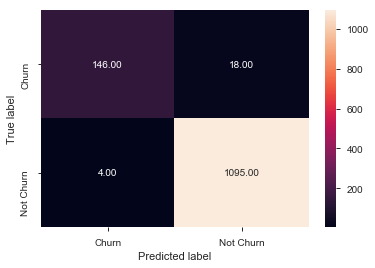

In [125]:
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Churn", "Not Churn"] , yticklabels = ["Churn", "Not Churn"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [126]:
score = metrics.accuracy_score( fund_train_pred.actual, fund_train_pred.predicted )
round( float(score), 2 )

0.98

    Overall test accuracy is 98% which is very good.We are looking to enhance that using Grid Search to Fine Tune 
    the parameters

    Best Score is seen for -
    {'max_depth': 7, 'max_features': 6}

In [127]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn.grid_search import GridSearchCV

C:\Users\lenovo\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [128]:
param_grid = {'max_depth': np.arange(3, 16),
             'max_features': np.arange(3,8)}

In [129]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10)
tree.fit( train_X, train_y )

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': array([3, 4, 5, 6, 7]), 'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [130]:
tree.best_params_

{'max_depth': 7, 'max_features': 6}

In [131]:
tree.best_score_

0.9893069306930693

### Building Final Decision Tree Model

In [295]:
train_X.head()

,Avg_Donation,COMMUNICATION_TYPE_BOTH_IN_OUT,COMMUNICATION_TYPE_ONLY_OUT,Count_Of_Bank_Transfer,Count_Of_Own_Initiative,Count_Of_Permanent_Order,Count_Of_Unknown_Paytypecd,Frequency,LANGUACODE_FR,LANGUACODE_NL,No_Of_Complaints,Recency,Total_Donation,Total_No_Of_Communications
14592,21.90,1,0,0,0,108,0,108,1,0,0,4075,2364.81,42
1420,122.98,0,1,0,0,25,0,25,0,1,0,4234,3074.46,57
16042,22.09,1,0,0,0,96,0,96,0,1,0,4075,2120.85,45
6258,21.03,1,0,1,0,121,0,122,0,1,0,4781,2565.70,54
15213,22.86,0,1,10,0,89,0,99,0,1,0,4075,2263.13,41


In [296]:
clf_tree = DecisionTreeClassifier( max_depth = 7, max_features=6 )
clf_tree.fit( train_X, train_y )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [299]:
tree_train_pred = pd.DataFrame( { 'actual':  train_y,
                            'predicted': clf_tree.predict( train_X ) } )

In [300]:
tree_test_pred.sample( n = 10 )

,actual,predicted
22981,1,1
21722,0,0
2511,0,0
1836,0,0
1519,0,0
21439,0,0
1183,0,0
8015,0,0
8895,1,0
2440,1,1


In [301]:
metrics.accuracy_score( tree_train_pred.actual, tree_train_pred.predicted )

0.99544554455445544

Text(0.5,12.5,u'Predicted label')

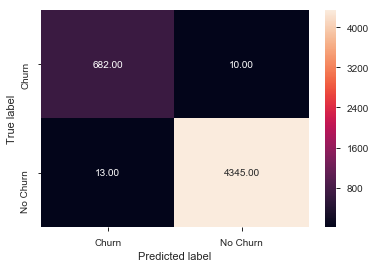

In [302]:
tree_cm = metrics.confusion_matrix( tree_train_pred.predicted,
                                 tree_train_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Churn", "No Churn"] , yticklabels = ["Churn", "No Churn"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

#### MODEL VALIDATION

In [303]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf_tree.predict( test_X ) } )

In [304]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.99049881235154391

Text(0.5,12.5,u'Predicted label')

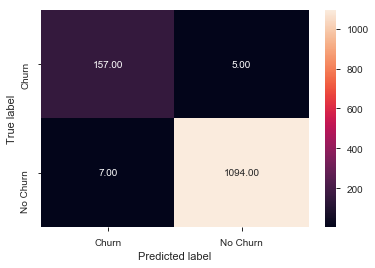

In [308]:
tree_cm_test = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm_test, annot=True,
         fmt='.2f',
         xticklabels = ["Churn", "No Churn"] , yticklabels = ["Churn", "No Churn"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

    So from the Decesion Tree we are able to establish the model with high accuracy ~ 99%.
    Lets validate the model using test_df
    {'max_depth': 7, 'max_features': 6}

### BUILDING RANDOM FOREST MODEL TO GET THE PROBABILITY OF CHURN FOR CUSTOMERS

In [251]:
from sklearn.ensemble import RandomForestClassifier

In [270]:
clf = RandomForestClassifier(n_estimators=6)
clf.fit( train_X, train_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [271]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': radm_clf.predict( test_X ) } )

In [272]:
metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted )

0.99129057798891529

Text(0.5,12.5,u'Predicted label')

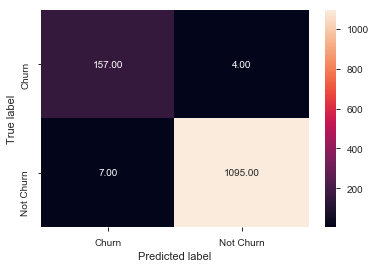

In [273]:
tree_cm = metrics.confusion_matrix( radm_test_pred.predicted,
                                 radm_test_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Churn", "Not Churn"] , yticklabels = ["Churn", "Not Churn"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

#### VALIDATE THE MODEL (using test_df) ANDF GET THE CHURN PROBABILITIES

    We are able to achive more that 99% accuracy for TRAIN and ~98% accuracy for TEST VALIDATION

In [274]:
# Make predictions for train
predictions_train = clf.predict(df_train[features])
probs_train = clf.predict_proba(df_train[features])
display(predictions_train)

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [275]:
score_train = clf.score(df_train[features], df_train["CHURN_IND"])
print("Accuracy: ", score_train)

('Accuracy: ', 0.99667353080944088)


In [278]:
train_df["prob_true"] = probs_train[:, 1]

In [276]:
# Make predictions for test
predictions = clf.predict(df_test[features])
probs = rm_clf.predict_proba(df_test[features])
display(predictions)

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [277]:
score = clf.score(df_test[features], df_test["CHURN_IND"])
print("Accuracy: ", score)

('Accuracy: ', 0.97896749521988524)


In [279]:
test_df["prob_true"] = probs[:, 1]

In [280]:
train_df.head()

,EXTRELNO,No_Of_Complaints,Total_No_Of_Communications,LANGUACODE_FR,LANGUACODE_NL,Count_Of_Unknown_Paytypecd,Total_Donation,Frequency,Count_Of_Bank_Transfer,Count_Of_Own_Initiative,Count_Of_Permanent_Order,Recency,Avg_Donation,CHURN_IND,COMMUNICATION_TYPE_BOTH_IN_OUT,COMMUNICATION_TYPE_ONLY_OUT,prob_true
1,0026419,0,60,0,1,0,3385.40,59,52,7,0,4090,57.38,0,1,0,0.0
5,0026431,0,57,0,1,0,3305.48,15,14,1,0,4339,220.37,0,0,1,0.0
7,0026443,0,52,0,1,0,3140.35,152,0,0,152,4075,20.66,0,0,1,0.0
8,0026444,0,61,0,1,0,3120.53,153,0,0,153,4075,20.40,0,0,1,0.0
9,0026446,0,79,0,1,0,3640.32,60,0,0,60,4075,60.67,0,1,0,0.0


In [175]:
test_df.head()

,EXTRELNO,No_Of_Complaints,Total_No_Of_Communications,LANGUACODE_FR,LANGUACODE_NL,Count_Of_Unknown_Paytypecd,Total_Donation,Frequency,Count_Of_Bank_Transfer,Count_Of_Own_Initiative,Count_Of_Permanent_Order,Recency,Avg_Donation,CHURN_IND,COMMUNICATION_TYPE_BOTH_IN_OUT,COMMUNICATION_TYPE_ONLY_OUT,prob_true
179,0027029,1,76,0,1,0,3894.98,18,17,1,0,4326,216.39,0,1,0,0.006134
841,0029468,0,109,0,1,0,5269.39,266,245,21,0,4070,19.81,0,1,0,0.000000
1579,0032313,0,264,0,1,0,14123.94,64,63,1,0,4294,220.69,0,1,0,0.006134
2136,0034186,0,28,0,1,0,951.24,53,39,14,0,4081,17.95,0,0,1,0.333333
2718,0036305,0,66,0,1,0,2984.46,49,0,0,49,4075,60.91,0,1,0,0.001630


    Concatination of test and train dataset to extract the probabilities for all the customers and derive the
    prediction

In [281]:
frames = [train_df, test_df]
prediction_df = pd.concat(frames)

In [282]:
prediction_df.to_csv("Fundraising-CHURN-Prediction.csv")

    Getting the Prediction probability of Active Customers Only
    Since we are interested to prevent existing active customer from churning; 
    we would like to cultivate on the active customer data only

In [283]:
prediction_of_actve_df = prediction_df[prediction_df.CHURN_IND == 0]

In [284]:
prediction_of_actve_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7010 entries, 1 to 26595
Data columns (total 17 columns):
EXTRELNO                          7010 non-null object
No_Of_Complaints                  7010 non-null int64
Total_No_Of_Communications        7010 non-null int64
LANGUACODE_FR                     7010 non-null int64
LANGUACODE_NL                     7010 non-null int64
Count_Of_Unknown_Paytypecd        7010 non-null int64
Total_Donation                    7010 non-null float64
Frequency                         7010 non-null int64
Count_Of_Bank_Transfer            7010 non-null int64
Count_Of_Own_Initiative           7010 non-null int64
Count_Of_Permanent_Order          7010 non-null int64
Recency                           7010 non-null int64
Avg_Donation                      7010 non-null float64
CHURN_IND                         7010 non-null int64
COMMUNICATION_TYPE_BOTH_IN_OUT    7010 non-null int64
COMMUNICATION_TYPE_ONLY_OUT       7010 non-null int64
prob_true              

#### CREATING BANDS FOR PROBABILITY OF CHURN -
    0.0 - 0.3    - LOW_CHURN_PROBABILITY
    > 0.3 – 0.7  - MED_CHURN_PROBABILITY
    > 0.7        - HIGH_CHURN_PROBABILITY


In [287]:
def churntyp(prediction_of_actve_df):
    if ((prediction_of_actve_df.prob_true  >= 0.0) & (prediction_of_actve_df.prob_true <= 0.3)):
        return 'LOW_CHURN_PROBABILITY'
    elif ((prediction_of_actve_df.prob_true  > 0.3) & (prediction_of_actve_df.prob_true <= 0.7)):
        return 'MED_CHURN_PROBABILITY'
    else:
        return 'HIGH_CHURN_PROBABILITY'

In [288]:
prediction_of_actve_df['CHURN_BAND'] = prediction_of_actve_df.apply(churntyp, axis=1)

C:\Users\lenovo\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [289]:
prediction_of_actve_df.head()

,EXTRELNO,No_Of_Complaints,Total_No_Of_Communications,LANGUACODE_FR,LANGUACODE_NL,Count_Of_Unknown_Paytypecd,Total_Donation,Frequency,Count_Of_Bank_Transfer,Count_Of_Own_Initiative,Count_Of_Permanent_Order,Recency,Avg_Donation,CHURN_IND,COMMUNICATION_TYPE_BOTH_IN_OUT,COMMUNICATION_TYPE_ONLY_OUT,prob_true,CHURN_BAND
1,0026419,0,60,0,1,0,3385.40,59,52,7,0,4090,57.38,0,1,0,0.0,LOW_CHURN_PROBABILITY
5,0026431,0,57,0,1,0,3305.48,15,14,1,0,4339,220.37,0,0,1,0.0,LOW_CHURN_PROBABILITY
7,0026443,0,52,0,1,0,3140.35,152,0,0,152,4075,20.66,0,0,1,0.0,LOW_CHURN_PROBABILITY
8,0026444,0,61,0,1,0,3120.53,153,0,0,153,4075,20.40,0,0,1,0.0,LOW_CHURN_PROBABILITY
9,0026446,0,79,0,1,0,3640.32,60,0,0,60,4075,60.67,0,1,0,0.0,LOW_CHURN_PROBABILITY


In [290]:
prediction_of_actve_df.to_csv("Fundraising-CHURN-Prediction-Active-With-BAND.csv")

    *******************************  Summarizing the probability of churn ****************************************

In [291]:
pd.pivot_table(prediction_of_actve_df,index=["CHURN_BAND"],values=["EXTRELNO"],aggfunc='count')

,EXTRELNO
CHURN_BAND,
HIGH_CHURN_PROBABILITY,16
LOW_CHURN_PROBABILITY,5541
MED_CHURN_PROBABILITY,1453


    ******************************** Thanks you !! **********************************************